In [1]:
from IPython.display import HTML

### Q1. 

What is happening here? Hazard a guess as to why these id's are the same.

In [2]:
e=[1,2,3,4]
d=1
id(e[0]), id(d)

(4297514912, 4297514912)

*your answer here*

Python allocates space in memory for commonly used integers. This is why these id's turn out the same. In fact this points to something we have hidden from you so far, something that will be critically important when we talk about sequences and the need for numpy. Python allocates memory elsewhere, on something called the heap. This will become clearer after the `C` lecture.

In [3]:
HTML('<iframe width="800" height="500" frameborder="0" src="http://pythontutor.com/iframe-embed.html#code=e%3D%5B1,2,3,4%5D%0Aprint(%22e%22,e%29&origin=opt-frontend.js&cumulative=false&heapPrimitives=true&textReferences=false&py=3&rawInputLstJSON=%5B%5D&curInstr=0&codeDivWidth=350&codeDivHeight=400"> </iframe>')

### Q2.

Here we work through an example taken from SICP, in which we try and write a bank account withdrawal system

In [4]:
def make_withdraw1(balance):
    """Return a withdraw function that draws down balance with each call."""
    def withdraw(amount):#you are ok if you use balance as a read-only property
        if amount > balance:
            return 'Insufficient funds'
        return balance - amount
    return withdraw

Lets make a 5 buck withdrawal

In [5]:
wdfrom20=make_withdraw1(20)
wdfrom20(5)

15

Lets do it again

In [6]:
wdfrom20(5)

15

This is not quite what we want. We'd want it to go down to 10 on a repeated withdrawal. Remember, writing it like this, we have no access to `balance` directly. In other words, we want `balance` that was captured from the enclosing frame to be *changeable*, not unchangeable. 

Lets try something simple. Even though `balance` was captured from the enclosing frame, lets try reassigning it in `withdraw`. So, write a new `make_withdraw2` in which `withdraw` has this re-assignment. What happens when you do this?

In [7]:
#your code here
def make_withdraw2(balance):
    """Return a withdraw function that draws down balance with each call."""
    def withdraw(amount):
        if amount > balance:
            return 'Insufficient funds'
        balance = balance - amount       # Re-bind the existing balance name
        return balance
    return withdraw

In [8]:
wdfrom20_2=make_withdraw2(20)
wdfrom20_2(5)

UnboundLocalError: local variable 'balance' referenced before assignment

If you did it right, you should have got an error. As the Python Execution Model says:

> If a name binding operation occurs anywhere within a code block, all uses of the name within the block are treated as references to the current block. This can lead to errors when a name is used within a block before it is bound. This rule is subtle. Python lacks declarations and allows name binding operations to occur anywhere within a code block. The local variables of a code block can be determined by scanning the entire text of the block for name binding operations.

What has happened is that `balance` is now being treated as a local variable in `withdraw`, since the assignment has created a "name" for it. And then it does not have a value.

### Q3.

We need to somehow tell Python that `balance` is NOT a local variable. The way to do this is the `nonlocal` keyword. Write a function `make_withdraw` using  

`nonlocal balance` 

as the first line of the inner `withdraw` function. 

In [9]:
#your code here
def make_withdraw(balance):
    """Return a withdraw function that draws down balance with each call."""
    def withdraw(amount):
        nonlocal balance
        if amount > balance:
            return "Insufficient funds"
        balance = balance - amount       # Re-bind the existing balance name
        return balance
    return withdraw

In [11]:
from20_correct = make_withdraw(20)
from20_correct(5)

15

In [12]:
from20_correct(5)

10

### Q4.

Go to http://pythontutor.com/index.html, choose Python 3.3 as the language, and visualize your code. Embed the code from above in there. Pay attention to the variable `balance` in `f1: make_withdraw`.

In [13]:
#your code here
HTML('<iframe width="800" height="500" frameborder="0" src="http://pythontutor.com/iframe-embed.html#code=def+make_withdraw(balance%29%3A%0A++++%22%22%22Return+a+withdraw+function+that+draws+down+balance+with+each+call.%22%22%22%0A++++def+withdraw(amount%29%3A%0A++++++++nonlocal+balance%0A++++++++if+amount+%3E+balance%3A%0A++++++++++++return+%22Insufficient+funds%22%0A++++++++balance+%3D+balance+-+amount+++++++%23+Re-bind+the+existing+balance+name%0A++++++++return+balance%0A++++return+withdraw%0A++++%0Afrom20_correct+%3D+make_withdraw(20%29%0Aprint(from20_correct(5%29%29%0Aprint(from20_correct(5%29%29&origin=opt-frontend.js&cumulative=false&heapPrimitives=false&textReferences=false&py=3&rawInputLstJSON=%5B%5D&curInstr=0&codeDivWidth=350&codeDivHeight=400"> </iframe>')

Notice that using the "constructor" `make_withdraw` twice creates two different "objects".

In [15]:
wd=make_withdraw(20)
print(wd(5))
wd2=make_withdraw(100)
print(wd2(5))

15
95


In [16]:
id(wd),id(wd2)

(4374629640, 4380069960)

Futhermore, notice that even though we cant access `balance` directly, we can change its value using the "created". So we now have a way to create state, as well as a way to change it. This is a very simple object system.

### Q5.

Use the decorator `timer` which we developed in the lecture to time how long it takes a function to run. Use this timer to plot a graph of the amount of time it takes to fill multiple arrays of size 100, 1000, 10000, 100000, 1000000, 10000000 with integers upto and not including that number.

In [33]:
#the decorator, slightly modified
import time
def time_returner(f):
    def inner(*args):
        t0 = time.time()
        f(*args)
        elapsed = time.time() - t0
        return elapsed
    return inner

In [34]:
#your code here
@time_returner
def fill_list(n):
    l = [i for i in range(n)]
    return l

[1.1205673217773438e-05, 6.794929504394531e-05, 0.000553131103515625, 0.006081104278564453, 0.07917094230651855, 0.7833011150360107]


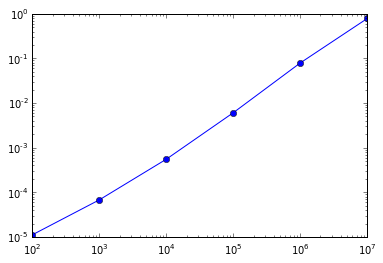

In [35]:
#your code here
%matplotlib inline
inputs = [100, 1000, 10000, 100000, 1000000, 10000000]
timings = []
for n in inputs:
    timetaken = fill_list(n)
    timings.append(timetaken)
print(outputs)
import matplotlib.pyplot as plt
plt.plot(inputs, outputs,'o-')
plt.xscale('log')
plt.yscale('log')

### Q6.

A decorator can have arguments.

If you want to create a decorator with arguments, such as for example, a state that is global such as a counter, what you need to do is to capture the state variable as a closure inside the decorating function.

Here is the skeleton for that:

```python
def call_to_create_a_decorator(state_arguments):
    def this_is_the_decorator_function(user_function):
        def inner_function(*args):
            #wrapping stuff here
            output = user_function(*args)
            #pehaps more wrapping here
            return output # or something else
        return inner_function
    return this_is_the_decorator_function
```

In [43]:
def call_counter(count_dictionary):
    def call_counter_decorator(func):
        def inner(*args, **kwargs):
            n = func.__name__
            #your code here
            if n not in count_dictionary:
                count_dictionary[n] = 0
            count_dictionary[n] += 1
            return func(*args, **kwargs)
        return inner
    return call_counter_decorator

In [44]:
storage={}

In [45]:
@call_counter(storage)
def fib_recursive(n):
    if n == 1:
        return 0
    if n == 2:
        return 1
    return fib_recursive(n-2) + fib_recursive(n-1)

In [46]:
@call_counter(storage)
def fact(n):
    if n<=1:
        return 1
    else:
        return n*fact(n-1)

Run the following code:

```python
for i in [7, 13, 29]:
    fib_recursive(i)
    fact(i)
    print(i, storage['fib_recursive'], storage['fact'])
```

In [49]:
# your code here
for i in [7, 13, 29]:
    fib_recursive(i)
    fact(i)
    print(i, storage['fib_recursive'], storage['fact'])

7 1028997 63
13 1029462 76
29 2057919 105


Enter the last two numbers (as below) in the google form http://goo.gl/forms/Fyv2PLiJdw.

In [51]:
print(storage['fib_recursive'], storage['fact'])

2057919 105
